# Competitive Intelligence through Webscraping with Python

## The Business Problem

A lot of data is contained on the web that can be useful to organizations if they were able to harness it in a structured manner for data analysis

Python is a great tool to use in webscraping. Along with its robust Regex capabilities, many websites can be scraped to develop comprehensive analysis for competitive intelligence in many different industries.

This project set out to look at publicly reported adult cardiac surgery outcomes as reported by the Society of Thoracic Surgeons (STS), a leader in the US cardiac surgery space for quality and outcomes reporting. The purpose of scraping this data is to enable a cardiac surgery service line to see the current layout of their competitors, find those that perform better than average, and learn from their practices to improve patient outcomes. 

The website being scraped: https://publicreporting.sts.org/search/acsd

## What Was Done

### Python Modules Used

We will use the following modules for the following reasons:
- **requests**: fetches contents of webpages
- **BeautifulSoup**: parse and navigate HTML conent fetched by requests
- **re**: used for working with Regex to define patterns that will be used to find or transform certain components we scrape
- **pandas**: creation of dataframes for the scraped data and exporting to CSV

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

### Retrieve HTML and Create BeautifulSoup Object

Here we will use **'urlopen()'** to fetch the HTML from our website and create the **'bs'** variable. The **'bs'** variable will contain a BeautifulSoup object that represents the HTML content of the webpage. This object can be used to parse, navigate, and manipulate the HTML content using the BeautifulSoup library's methods and properties.

In [2]:
#retrieve the HTML content of the webpage located at the URL 'https://publicreporting.sts.org/search/acsd'.
html = urlopen('https://publicreporting.sts.org/search/acsd')

# creates a BeautifulSoup object bs that can be used to parse and manipulate the HTML content.
bs = BeautifulSoup(html.read(), 'html.parser')

### Identify All Sub-links In A Page

The STS Public Reporting webstie contains all the competitve intelligence data in sublinks on each page.

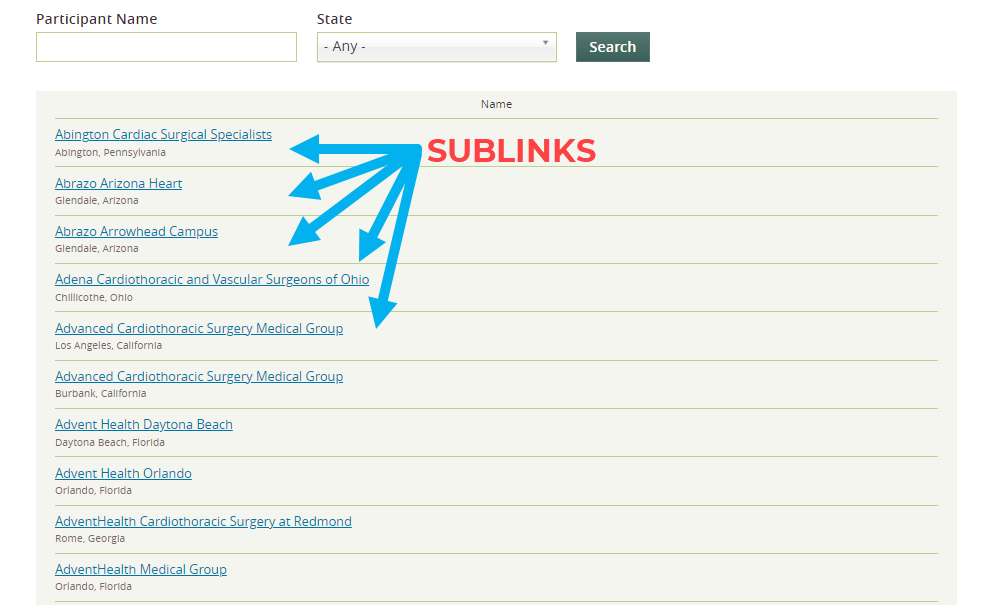

First we will tackle extracting the data from each of these sublinks, then looping through all the pages and their links to get

Here we return a list of all a tags whose href attribute matches the regular expression pattern /participant/\d+, where \d+ matches one or more digits.the full data set.

In [3]:
# regular expression pattern to match '/participant/' followed by any number of digits
pattern = re.compile(r'/participant/\d+')

# find all 'a' tags with 'href' attribute matching the regular expression pattern
bs.find_all('a', href=pattern)

[<a href="/participant/30451">Abington Cardiac Surgical Specialists</a>,
 <a href="/participant/30840">Abrazo Arizona Heart</a>,
 <a href="/participant/30460">Abrazo Arrowhead Campus</a>,
 <a href="/participant/30480">Adena Cardiothoracic and Vascular Surgeons of Ohio</a>,
 <a href="/participant/30392">Advanced Cardiothoracic Surgery Medical Group</a>,
 <a href="/participant/30501">Advanced Cardiothoracic Surgery Medical Group</a>,
 <a href="/participant/30843">Advent Health Daytona Beach</a>,
 <a href="/participant/31065">Advent Health Orlando</a>,
 <a href="/participant/11609">AdventHealth Cardiothoracic Surgery at Redmond</a>,
 <a href="/participant/31085">AdventHealth Medical Group</a>,
 <a href="/participant/30493">AdventHealth Medical Group Cardiovascular Surgery</a>,
 <a href="/participant/11103">Adventist Health Care White Oak Medical Center Surgical Associates</a>,
 <a href="/participant/30668">AHN Cardiovascular Institute – Forbes Hospital</a>,
 <a href="/participant/30121">A

### Extracting Data From the First Link in a Page

Here we worked through each element we wanted from a specific link to ensure that we had what we needed before beginning to work through each link in a page. 

We first find all the a tags whose href attribute matches the regular expression pattern using find_all function. Then we extract the href attribute value from the first link in the list using links[0]['href']. We use this value to construct the URL for the page we want to scrape, and make a GET request using requests.get. We then create a BeautifulSoup object from the response content, which allows us to extract information from the page using various methods provided by BeautifulSoup.

We then use find method to find the HTML elements containing the information we're interested in the first procedure, CABG (coronary artery bypass grafting):
- hospital name
- location
- procedure type
- time period of rating
- overall composite score
- the upper and lower confidence intervals
- star rating

We then use the text attribute to extract the text content of the elements, and strip method to remove any leading or trailing whitespace.

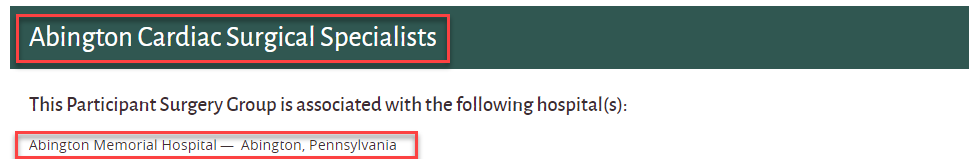

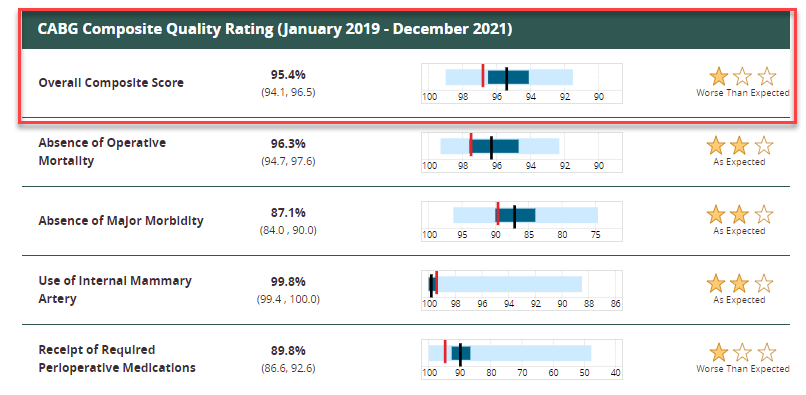

In [5]:
# find all 'a' tags with 'href' attribute matching the regular expression pattern
links = bs.find_all('a', href=pattern)

# Scrape content from the first link
if links:
    link = links[0]['href']
    
    # Extract digits from the link
    digits = re.findall(r'\d+', link)
    pid = int(digits[0]) if digits else None

    url = f'https://publicreporting.sts.org/{link}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract hospital, location, procedure_timeframe, composite_score, overall_mortality, and absence_mortality
    # using BeautifulSoup
    hospital = soup.find('h1').text.strip()
    location = soup.find('div', {'class':'field field--name-field-places field--type-entity-reference field--label-hidden field__item' }).text.strip()
    procedure_timeframe = soup.find('div', {'class': 'views-field views-field-type'}).text.strip()
    composite_score = soup.find('div', {'class': 'views-field-field-star-overall-op-mortality'}).text.strip()
    overall_mortality = soup.find('div', {'class': 'views-field-field-star-overall-op-mortality-1'}).text.strip()
    absence_mortality = soup.find('div', {'class': 'views-field views-field-field-star-abs-op-mortality'}).text.strip()
    
    # Print the scraped information
    print(pid)
    print(hospital)
    print(location)
    print(procedure_timeframe)
    print(composite_score)
    print(overall_mortality)
    print(absence_mortality)


30451
Abington Cardiac Surgical Specialists
Abington, Pennsylvania
CABG Composite Quality Rating

(January 2019 - December 2021)
Overall Composite Score    95.4% 
 (94.1, 96.5)
Worse Than Expected


1 stars
Absence of Operative Mortality   96.3% 
 (94.7, 97.6)


### Structuring the Data into A Dictionary and putting it into a Dataframe

After getting a good output on what we want to extract, we store the scraped information into a dictionary with the appropriate keys. We then create a dataframe from the dictionary using pd.DataFrame. 

We will print it and export to CSV as well to see if the output is what we want.

In [9]:
    # create a dictionary from the scraped information
    data = {'pid': [pid], 'hospital': [hospital], 'location': [location], 'procedure_timeframe': [procedure_timeframe], 
            'composite_score': [composite_score], 'overall_mortality': [overall_mortality]}

    
    # create a dataframe from the dictionary
    df = pd.DataFrame(data)

    # print the dataframe
    print(df)
    
    df.to_csv('STSWebscrape.csv')

     pid                               hospital                location  \
0  30451  Abington Cardiac Surgical Specialists  Abington, Pennsylvania   

                                 procedure_timeframe  \
0  CABG Composite Quality Rating\n\n(January 2019...   

                                    composite_score  \
0  Overall Composite Score    95.4% \n (94.1, 96.5)   

                  overall_mortality  
0  Worse Than Expected\n\n\n1 stars  


**Initial CSV Output**
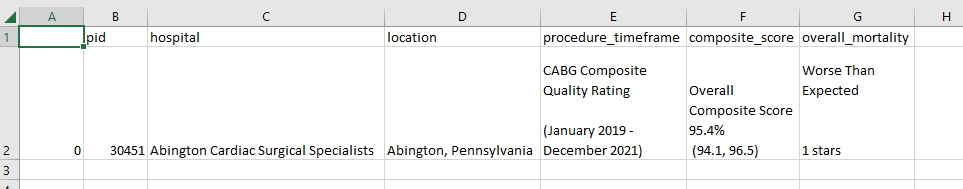

### Breaking down the Outputs into More Usable Information

At this point the procedure_timeframe, composite_score, & overall_mortality outputs aren't very useful. We will use some additional scripting to break them up into more meaningful 

We first split the procedure_timeframe into three parts to get the name of the procedure and the first date and last date included in the analysis. Then we split the overall_mortality field into two parts to extract the seperate text components of the star rating. Then we split the composite_score into two parts based on the opening parenthesis using the split method. We then replace the text "Overall Composite Score" in the overall score string with an empty string using replace. Next, we split the remaining part of the string into two parts based on the comma using split, strip any whitespace from the parts using strip, and assign them to lower_ci and upper_ci. 

We use strip to remove and any leading or trailing whitespace from all these components. 

In [13]:
# regular expression pattern to match '/participant/' followed by any number of digits
pattern = re.compile(r'/participant/\d+')

# find all 'a' tags with 'href' attribute matching the regular expression pattern
links = bs.find_all('a', href=pattern)

# scrape content from the first link
if links:
    link = links[0]['href']
    
    # Extract digits from the link
    digits = re.findall(r'\d+', link)
    pid = int(digits[0]) if digits else None
    
    
    url = f'https://publicreporting.sts.org/{link}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # extract information from the scraped page using BeautifulSoup
    procedure_timeframe = soup.find('div', {'class': 'views-field views-field-type'}).text.strip()
    rating_parts = re.match(r'(.+)\s*\((.+?)\s*-\s*(.+?)\)', procedure_timeframe)
    rating_name = rating_parts.group(1).strip()
    start_date = rating_parts.group(2).strip()
    end_date = rating_parts.group(3).strip()
    overall_mortality = soup.find('div', {'class': 'views-field-field-star-overall-op-mortality-1'}).text.strip()
    overall_mortality_parts = re.match(r'(.+)\s+(\d+\s+\w+)', overall_mortality)
    overall_mortality_text = overall_mortality_parts.group(1).strip()
    overall_mortality_rating = overall_mortality_parts.group(2).strip()
    composite_score = soup.find('div', {'class': 'views-field-field-star-overall-op-mortality'}).text.strip()
    composite_score_parts = composite_score.split('(')
    overall_score = composite_score.split('(')[0].replace('Overall Composite Score', '').strip()
    ci_parts = composite_score_parts[1].replace(')', '').split(',')
    lower_ci = ci_parts[0].strip()
    upper_ci = ci_parts[1].strip()
      
    

    # create a dictionary from the scraped information
    data = {'pid': [pid], 'hospital': [hospital], 'location': [location], 
            'rating_name': [rating_name], 'start_date': [start_date], 'end_date': [end_date], 
            'overall_score': [overall_score], 'lower_ci': [lower_ci], 'upper_ci': [upper_ci], 
            'overall_mortality_text': [overall_mortality_text], 'overall_mortality_rating': [overall_mortality_rating]}

    # create a dataframe from the dictionary
    df = pd.DataFrame(data)

    # print the dataframe
    print(df)
    
df.to_csv('STSWebscrape.csv')

     pid                               hospital                location  \
0  30451  Abington Cardiac Surgical Specialists  Abington, Pennsylvania   

                     rating_name    start_date       end_date overall_score  \
0  CABG Composite Quality Rating  January 2019  December 2021         95.4%   

  lower_ci upper_ci overall_mortality_text overall_mortality_rating  
0     94.1     96.5    Worse Than Expected                  1 stars  


**Second CSV Output**
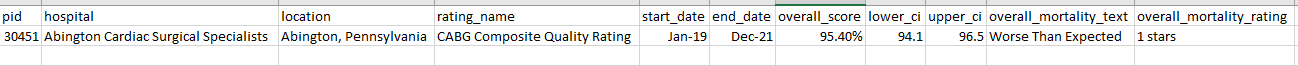

### Looping through all the Links on the First Page

Now that we have what we want from the first page, we want to attempt to loop through all the links on the first page to extract the information we want. We do this using a try-except block to handle cases where the desired data is not found.

The code below will iterate through all links with the specified pattern and scrape data from each one creating a dictionary for each link with the components we want then create a dataframe using pandas and append it to the list **'dfs'**. 

Lastly is will concatenate all the individual dataframes in the list **'dfs'** into a single dataframe **'result'**. Note that the index=False argument in the to_csv function call is used to prevent the index column from being included in the exported CSV file. 

This code will skip any sites that do not have a rating (ratings are not given either becuase the program does not report publicly or the volume is too low for a procedure to receive a rating). 

We are only still looking at CABG ratings and have not attempted to look at other procedure ratings.

In [15]:
#loop through links on first page
# regular expression pattern to match '/participant/' followed by any number of digits
pattern = re.compile(r'/participant/\d+')

# create an empty list to store the dataframes
dfs = []

# loop through all links with the pattern
for link in bs.find_all('a', href=pattern):
    url = f'https://publicreporting.sts.org/{link["href"]}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract digits from the link
    digits = re.findall(r'\d+', link['href'])
    pid = int(digits[0]) if digits else None

    # extract hospital and location
    hospital = soup.find('h1').text.strip()
    location = soup.find('div', {'class':'field field--name-field-places field--type-entity-reference field--label-hidden field__item' }).text.strip()

    try:
        # extract rating data
        procedure_timeframe = soup.find('div', {'class': 'views-field views-field-type'}).text.strip()
        rating_parts = re.match(r'(.+)\s*\((.+?)\s*-\s*(.+?)\)', procedure_timeframe)
        rating_name = rating_parts.group(1).strip()
        start_date = rating_parts.group(2).strip()
        end_date = rating_parts.group(3).strip()

        # extract overall mortality rating and split into descriptive text and numeric rating using regular expression
        overall_mortality = soup.find('div', {'class': 'views-field-field-star-overall-op-mortality-1'}).text.strip()
        overall_mortality_parts = re.match(r'(.+)\s+(\d+\s+\w+)', overall_mortality)
        overall_mortality_text = overall_mortality_parts.group(1).strip()
        overall_mortality_rating = overall_mortality_parts.group(2).strip()

        # extract composite score
        composite_score = soup.find('div', {'class': 'views-field-field-star-overall-op-mortality'}).text.strip()
        overall_score = composite_score.split('(')[0].replace('Overall Composite Score', '').strip()
        ci_parts = composite_score.split('(')[1].replace(')', '').split(',')
        lower_ci = ci_parts[0].strip()
        upper_ci = ci_parts[1].strip()

        # create a dictionary from the scraped information
        data = {'pid': [pid], 'hospital': [hospital], 'location': [location], 'rating_name': [rating_name], 'start_date': [start_date], 'end_date': [end_date],
                'overall_score': [overall_score], 'lower_ci': [lower_ci], 'upper_ci': [upper_ci], 
                'overall_mortality_text': [overall_mortality_text], 'overall_mortality_rating': [overall_mortality_rating]}

        # create a dataframe from the dictionary and append to the list of dataframes
        dfs.append(pd.DataFrame(data))
    except AttributeError:
        # skip the page if the desired data is not found
        continue

# concatenate all dataframes in the list into one dataframe
result = pd.concat(dfs, ignore_index=True)

print(result)

# export the dataframe to a CSV file
result.to_csv('STSWebscrape.csv', index = False)

      pid                                           hospital  \
0   30451              Abington Cardiac Surgical Specialists   
1   30840                               Abrazo Arizona Heart   
2   30460                            Abrazo Arrowhead Campus   
3   30480  Adena Cardiothoracic and Vascular Surgeons of ...   
4   30392      Advanced Cardiothoracic Surgery Medical Group   
5   30501      Advanced Cardiothoracic Surgery Medical Group   
6   30843                        Advent Health Daytona Beach   
7   31065                              Advent Health Orlando   
8   11609     AdventHealth Cardiothoracic Surgery at Redmond   
9   31085                         AdventHealth Medical Group   
10  30493  AdventHealth Medical Group Cardiovascular Surgery   
11  11103  Adventist Health Care White Oak Medical Center...   
12  30668     AHN Cardiovascular Institute – Forbes Hospital   
13  30121       Alaska Regional Hospital Surgical Associates   
14  12628                    Alexian Bro

**First Page with all Links Output to CSV**
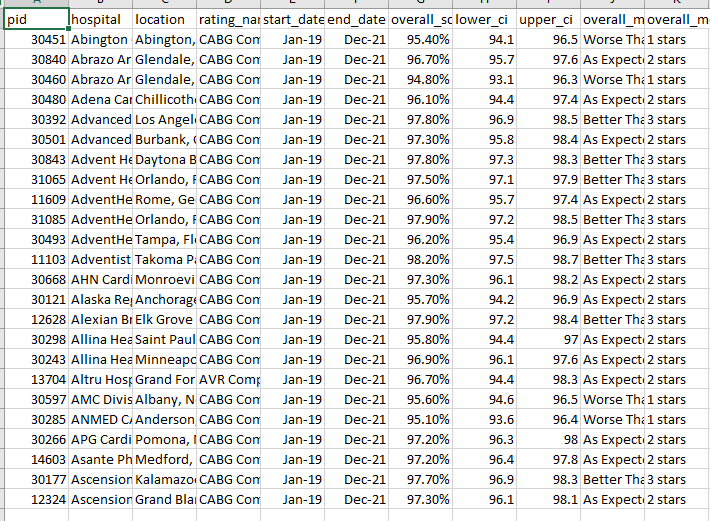

# Putting Everything Together

Here we put the libraries to be imported to consolidate the query and also add a few prompts to print while running the query to show it is working while it runs.

The print prompts include:
- Number of links found in a page
- Which page is being currently processed 
- And "No Data Found" is printed at the end of the for loop

In [8]:
# Import libraries needed
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Create an empty list to store the dataframes
dfs = []

# Get the page content
base_url = 'https://publicreporting.sts.org/search/acsd?page=0'
response = requests.get(base_url)
bs = BeautifulSoup(response.content, 'html.parser')

# Regular expression pattern to match '/participant/' followed by any number of digits
pattern = re.compile(r'/participant/\d+')

# Loop through all links with the pattern
links = bs.find_all('a', href=pattern)
print(f'Found {len(links)} links')

for link in links:
    url = f'https://publicreporting.sts.org/{link["href"]}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    print(f'Processing link: {url}')
    
    # Extract digits from the link
    digits = re.findall(r'\d+', link['href'])
    pid = int(digits[0]) if digits else None

    # Check if the hospital_tag and location_tag are not found, and continue to the next link
    hospital_tag = soup.find('h1')
    location_tag = soup.find('div', {'class': 'field field--name-field-places field--type-entity-reference field--label-hidden field__item'})
    if not (hospital_tag and location_tag):
        continue

    # Extract hospital and location
    hospital = hospital_tag.text.strip()
    location = location_tag.text.strip()

    # Extract multiple instances of rating, overall_mortality, and composite_score
    rating_sections = soup.find_all('section', {'class': 'compositeScoreSection'})

    for section in rating_sections:
        try:
            # Extract rating data
            procedure_timeframe = section.find('span', {'class': 'field-content'}).text.strip()
            rating_parts = re.match(r'(.+)\s*\((.+?)\s*-\s*(.+?)\)', procedure_timeframe)
            rating_name = rating_parts.group(1).strip()
            start_date = rating_parts.group(2).strip()
            end_date = rating_parts.group(3).strip()

            # Extract overall mortality rating and split into descriptive text and numeric rating using regular expression
            overall_mortality_divs = section.find_all('div', class_=re.compile(r'views-field-field-star-overall-op-mortality-\d+'))
            overall_mortality_div = next((div for div in overall_mortality_divs if div.text.strip()), None)

            if overall_mortality_div:
                overall_mortality = overall_mortality_div.text.strip()
            else:
                continue

            overall_mortality_parts = re.match(r'(.+)\s+(\d+\s+\w+)', overall_mortality)
            overall_mortality_text = overall_mortality_parts.group(1).strip()
            overall_mortality_rating = overall_mortality_parts.group(2).strip()

            # Extract composite score
            composite_score = section.find('div', {'class': 'views-field-field-star-overall-composite'}).text.strip()
            overall_score = composite_score.split('(')[0].replace('Overall Composite Score', '').strip()
            ci_parts = composite_score.split('(')[1].replace(')', '').split(',')
            lower_ci = ci_parts[0].strip()
            upper_ci = ci_parts[1].strip()

            # create a dictionary from the scraped information
            data = {'pid': [pid], 'hospital': [hospital], 'location': [location], 
                    'rating_name': [rating_name], 'start_date': [start_date], 'end_date': [end_date],
                    'overall_score': [overall_score], 'lower_ci': [lower_ci], 'upper_ci': [upper_ci], 
                    'overall_mortality_text': [overall_mortality_text], 'overall_mortality_rating': [overall_mortality_rating]}


            # create a dataframe from the dictionary and append to the list of dataframes
            print(f'Appending data for {hospital}, {location}')
            dfs.append(pd.DataFrame(data))
        except AttributeError:
            # skip the entry if the desired data is not found
            continue


# Concatenate all dataframes in the list into one dataframe
if dfs:
    result = pd.concat(dfs, ignore_index=True)

else:
    print("No data found.")
    
# export the dataframe to a CSV file
result.to_csv('STSWebscrape_new.csv', index = False)

Found 25 links
Processing link: https://publicreporting.sts.org//participant/30451
Processing link: https://publicreporting.sts.org//participant/30840
Processing link: https://publicreporting.sts.org//participant/30460
Processing link: https://publicreporting.sts.org//participant/30480
Processing link: https://publicreporting.sts.org//participant/30392
Processing link: https://publicreporting.sts.org//participant/30501
Processing link: https://publicreporting.sts.org//participant/30843
Processing link: https://publicreporting.sts.org//participant/31065
Processing link: https://publicreporting.sts.org//participant/11609
Processing link: https://publicreporting.sts.org//participant/31085
Processing link: https://publicreporting.sts.org//participant/30493
Processing link: https://publicreporting.sts.org//participant/11103
Processing link: https://publicreporting.sts.org//participant/30668
Processing link: https://publicreporting.sts.org//participant/30121
Processing link: https://publicre

### Looping through mulitple pages and multiple links per page

Since the website is structured with multiple pages, we need to set up a while loop to iterate through all the pages.
We changed the base_url to a formatted string to take an input that loops through the pages.
The loop breaks if there are no links found on the page, effectively ending the webscrape.

The try-except block was modified to only be around the extraction of the rating, overall_mortality, and composite_score data to handle errors more specifically during the extraction process.

This code also handles the data using the **'zip()'** function zip the individually created lists together and create dictionaries for each page that is then appended together to create the final output.

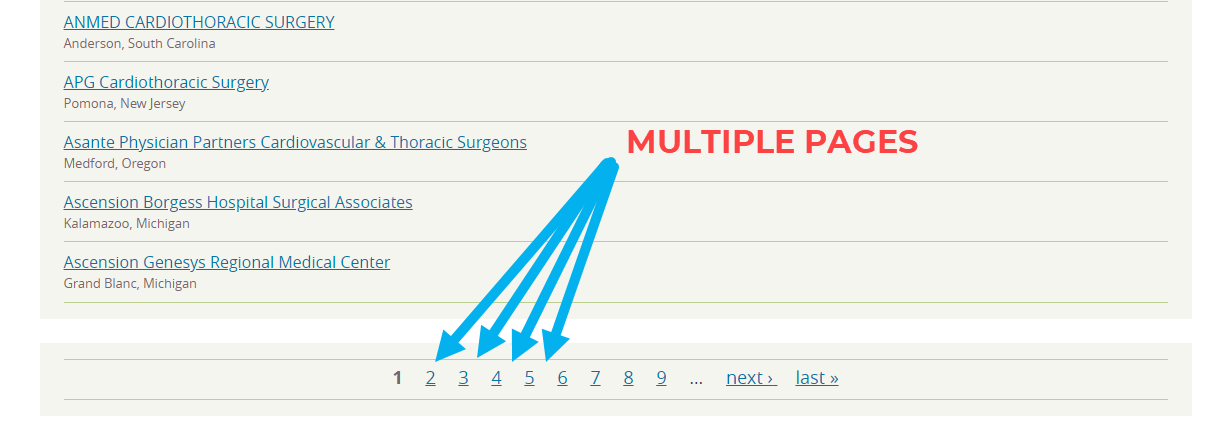

In [33]:
# Import libraries needed
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Create an empty list to store the dataframes
dfs = []

# Loop through pages
page = 0
while True:

    # Get the page content
    base_url = f'https://publicreporting.sts.org/search/acsd?page={page}'
    response = requests.get(base_url)
    bs = BeautifulSoup(response.content, 'html.parser')

    # Regular expression pattern to match '/participant/' followed by any number of digits
    pattern = re.compile(r'/participant/\d+')

    # Loop through all links with the pattern
    links = bs.find_all('a', href=pattern)
    
    # If no links are found on the current page, exit the loop
    if not links:
        break

    for link in links:
        url = f'https://publicreporting.sts.org/{link["href"]}'
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        print(f'Processing link: {url}')
        
        # Extract digits from the link
        digits = re.findall(r'\d+', link['href'])
        pid = int(digits[0]) if digits else None

        # extract hospital and location
        hospital_tag = soup.find('h1')
        location_tag = soup.find('div', {'class':'field field--name-field-places field--type-entity-reference field--label-hidden field__item'})


        try:
            # extract rating data
            rating_tags = soup.find_all('span', {'class': 'field-content'})
            ratings = []
            for rating_tag in rating_tags:
                rating = rating_tag.text.strip()
                rating_parts = re.match(r'(.+)\s*\((.+?)\s*-\s*(.+?)\)', rating)
                if rating_parts:
                    rating_name = rating_parts.group(1).strip()
                    start_date = rating_parts.group(2).strip()
                    end_date = rating_parts.group(3).strip()
                    ratings.append((rating_name, start_date, end_date))

            # extract overall mortality ratings
            overall_mortality_tags = soup.find_all('div', {'class': 'views-field-field-star-overall-op-mortality-1'})
            overall_mortalities = []
            for overall_mortality_tag in overall_mortality_tags:
                overall_mortality = overall_mortality_tag.text.strip()
                overall_mortality_parts = re.match(r'(.+)\s+(\d+\s+\w+)', overall_mortality)
                if overall_mortality_parts:
                    overall_mortality_text = overall_mortality_parts.group(1).strip()
                    overall_mortality_rating = overall_mortality_parts.group(2).strip()
                    overall_mortalities.append((overall_mortality_text, overall_mortality_rating))

            # extract composite scores
            composite_score_tags = soup.find_all('div', {'class': 'views-field-field-star-overall-op-mortality'})
            composite_scores = []
            for composite_score_tag in composite_score_tags:
                composite_score = composite_score_tag.text.strip()
                overall_score = composite_score.split('(')[0].replace('Overall Composite Score', '').strip()
                ci_parts = composite_score.split('(')[1].replace(')', '').split(',')
                lower_ci = ci_parts[0].strip()
                upper_ci = ci_parts[1].strip()
                composite_scores.append((overall_score, lower_ci, upper_ci))

            # Process and store the data from the lists
            for rating, overall_mortality, composite_score in zip(ratings, overall_mortalities, composite_scores):
                rating_name, start_date, end_date = rating
                overall_mortality_text, overall_mortality_rating = overall_mortality
                overall_score, lower_ci, upper_ci = composite_score

                # Create a dictionary from the scraped information
                data = {'pid': [pid], 'hospital': hospital, 'location': location, 
                        'rating_name': rating_name, 'start_date': start_date, 'end_date': end_date,
                        'overall_score': overall_score, 'lower_ci': lower_ci, 'upper_ci': upper_ci,
                        'overall_mortality_text': overall_mortality_text, 'overall_mortality_rating': overall_mortality_rating}

                # Append the dictionary to the list of dictionaries
                dfs.append(data)
        except AttributeError:
            # skip the page if the desired data is not found
            continue

    # Increment the page number for the next iteration
    print(f'Finished processing page {page}')
    page += 1
            

if dfs:
    result = pd.DataFrame(dfs)

else:
    print("No data found.")


# export the dataframe to a CSV file
result.to_csv('STSWebscrape.csv', index = False)

Processing link: https://publicreporting.sts.org//participant/30451
Processing link: https://publicreporting.sts.org//participant/30840
Processing link: https://publicreporting.sts.org//participant/30460
Processing link: https://publicreporting.sts.org//participant/30480
Processing link: https://publicreporting.sts.org//participant/30392
Processing link: https://publicreporting.sts.org//participant/30501
Processing link: https://publicreporting.sts.org//participant/30843
Processing link: https://publicreporting.sts.org//participant/31065
Processing link: https://publicreporting.sts.org//participant/11609
Processing link: https://publicreporting.sts.org//participant/31085
Processing link: https://publicreporting.sts.org//participant/30493
Processing link: https://publicreporting.sts.org//participant/11103
Processing link: https://publicreporting.sts.org//participant/30668
Processing link: https://publicreporting.sts.org//participant/30121
Processing link: https://publicreporting.sts.org

Processing link: https://publicreporting.sts.org//participant/30816
Processing link: https://publicreporting.sts.org//participant/13401
Processing link: https://publicreporting.sts.org//participant/30805
Processing link: https://publicreporting.sts.org//participant/30636
Processing link: https://publicreporting.sts.org//participant/30137
Processing link: https://publicreporting.sts.org//participant/30476
Finished processing page 4
Processing link: https://publicreporting.sts.org//participant/30476
Processing link: https://publicreporting.sts.org//participant/12503
Processing link: https://publicreporting.sts.org//participant/30967
Processing link: https://publicreporting.sts.org//participant/30909
Processing link: https://publicreporting.sts.org//participant/30420
Processing link: https://publicreporting.sts.org//participant/30985
Processing link: https://publicreporting.sts.org//participant/12317
Processing link: https://publicreporting.sts.org//participant/30487
Processing link: http

Processing link: https://publicreporting.sts.org//participant/30223
Processing link: https://publicreporting.sts.org//participant/30312
Processing link: https://publicreporting.sts.org//participant/14208
Processing link: https://publicreporting.sts.org//participant/30644
Processing link: https://publicreporting.sts.org//participant/14829
Processing link: https://publicreporting.sts.org//participant/30586
Processing link: https://publicreporting.sts.org//participant/14801
Processing link: https://publicreporting.sts.org//participant/30879
Processing link: https://publicreporting.sts.org//participant/30651
Processing link: https://publicreporting.sts.org//participant/30116
Processing link: https://publicreporting.sts.org//participant/30876
Processing link: https://publicreporting.sts.org//participant/30023
Finished processing page 9
Processing link: https://publicreporting.sts.org//participant/14812
Processing link: https://publicreporting.sts.org//participant/30457
Processing link: http

Processing link: https://publicreporting.sts.org//participant/30862
Processing link: https://publicreporting.sts.org//participant/30633
Processing link: https://publicreporting.sts.org//participant/30750
Processing link: https://publicreporting.sts.org//participant/13239
Processing link: https://publicreporting.sts.org//participant/30153
Processing link: https://publicreporting.sts.org//participant/30095
Processing link: https://publicreporting.sts.org//participant/12232
Processing link: https://publicreporting.sts.org//participant/30034
Processing link: https://publicreporting.sts.org//participant/31082
Processing link: https://publicreporting.sts.org//participant/11707
Processing link: https://publicreporting.sts.org//participant/12326
Processing link: https://publicreporting.sts.org//participant/30945
Processing link: https://publicreporting.sts.org//participant/30400
Processing link: https://publicreporting.sts.org//participant/10916
Processing link: https://publicreporting.sts.org

Processing link: https://publicreporting.sts.org//participant/13503
Processing link: https://publicreporting.sts.org//participant/13504
Processing link: https://publicreporting.sts.org//participant/30578
Processing link: https://publicreporting.sts.org//participant/10201
Processing link: https://publicreporting.sts.org//participant/30991
Processing link: https://publicreporting.sts.org//participant/30666
Processing link: https://publicreporting.sts.org//participant/30951
Processing link: https://publicreporting.sts.org//participant/31010
Processing link: https://publicreporting.sts.org//participant/30087
Processing link: https://publicreporting.sts.org//participant/30195
Processing link: https://publicreporting.sts.org//participant/30198
Processing link: https://publicreporting.sts.org//participant/12611
Processing link: https://publicreporting.sts.org//participant/30681
Processing link: https://publicreporting.sts.org//participant/30497
Processing link: https://publicreporting.sts.org

Processing link: https://publicreporting.sts.org//participant/13706
Processing link: https://publicreporting.sts.org//participant/13602
Processing link: https://publicreporting.sts.org//participant/13702
Processing link: https://publicreporting.sts.org//participant/30924
Processing link: https://publicreporting.sts.org//participant/11412
Finished processing page 23
Processing link: https://publicreporting.sts.org//participant/30925
Processing link: https://publicreporting.sts.org//participant/30175
Processing link: https://publicreporting.sts.org//participant/14004
Processing link: https://publicreporting.sts.org//participant/30975
Processing link: https://publicreporting.sts.org//participant/14826
Processing link: https://publicreporting.sts.org//participant/30824
Processing link: https://publicreporting.sts.org//participant/30827
Processing link: https://publicreporting.sts.org//participant/30629
Processing link: https://publicreporting.sts.org//participant/14833
Processing link: htt

Processing link: https://publicreporting.sts.org//participant/30992
Processing link: https://publicreporting.sts.org//participant/30993
Processing link: https://publicreporting.sts.org//participant/12212
Processing link: https://publicreporting.sts.org//participant/30038
Processing link: https://publicreporting.sts.org//participant/11602
Processing link: https://publicreporting.sts.org//participant/11802
Processing link: https://publicreporting.sts.org//participant/30779
Processing link: https://publicreporting.sts.org//participant/12103
Processing link: https://publicreporting.sts.org//participant/11101
Processing link: https://publicreporting.sts.org//participant/11105
Processing link: https://publicreporting.sts.org//participant/11102
Finished processing page 28
Processing link: https://publicreporting.sts.org//participant/31070
Processing link: https://publicreporting.sts.org//participant/30041
Processing link: https://publicreporting.sts.org//participant/30663
Processing link: htt

# What Was Solved

After getting the full extract, the data was put into PowerBI where programs were categorized by star ratings, geography, rank, and comparison to how our facility performed. This script also allows us to update the data as the website is refreshed with new ratings, giving ongoing insight into the national performance of programs relative to ours.

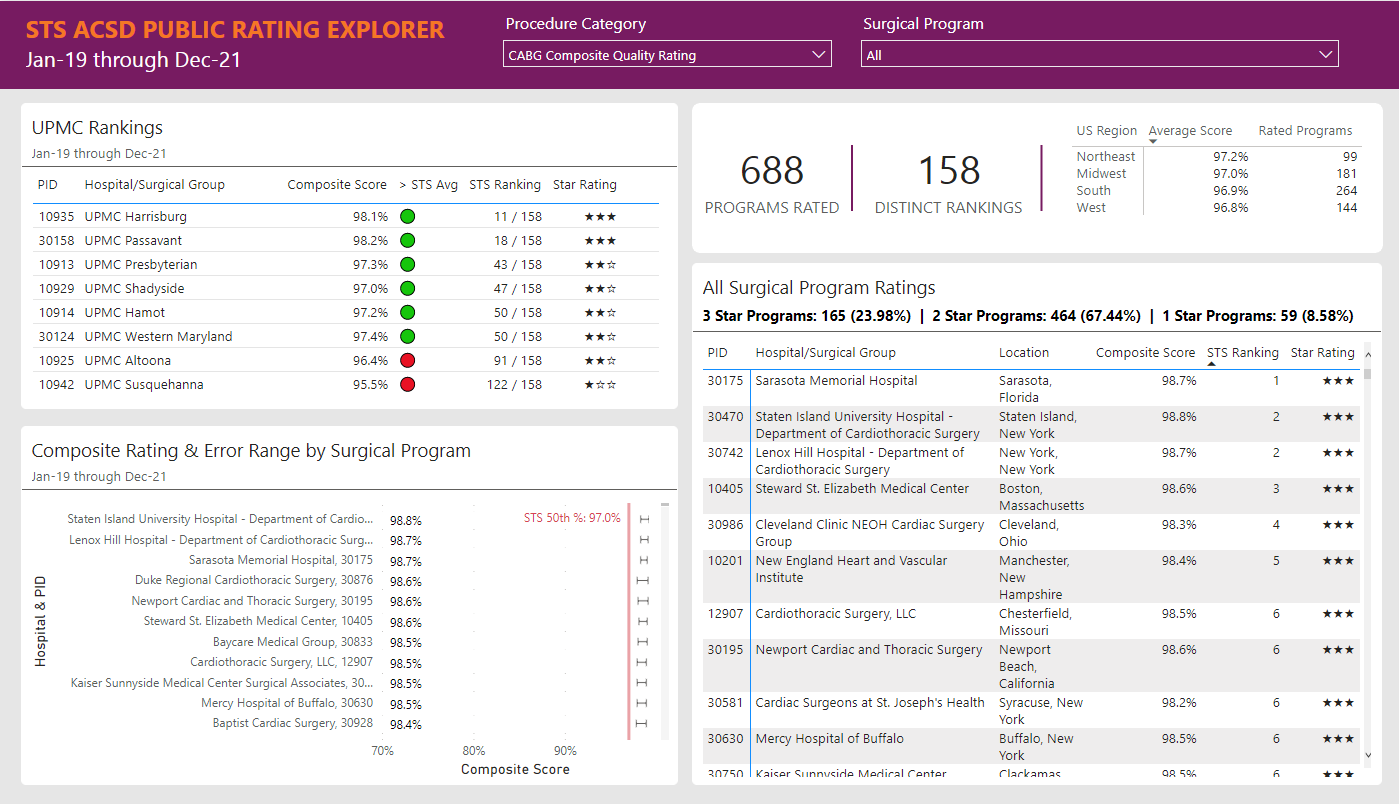

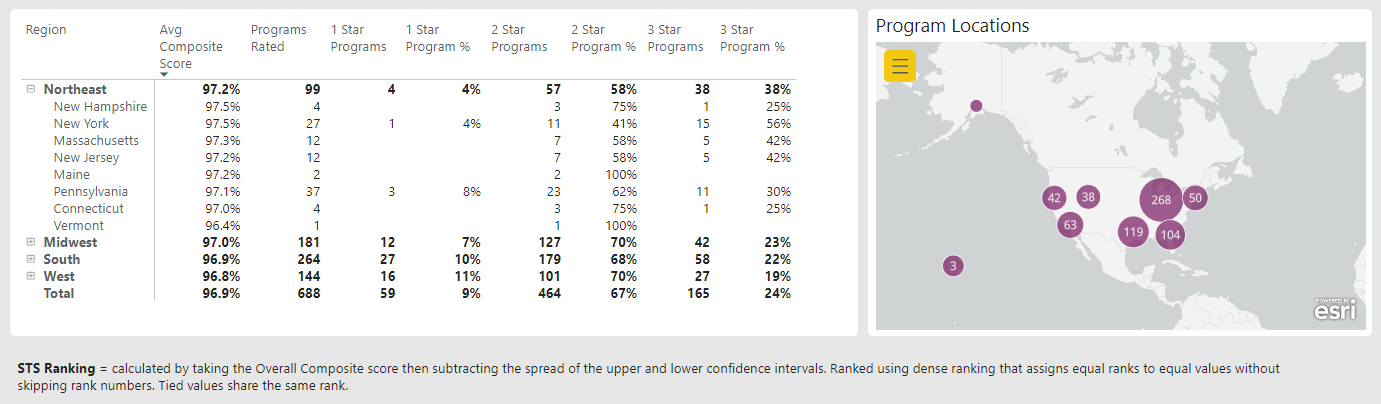